<a href="https://colab.research.google.com/github/DRIII33/DRIII/blob/main/DRIII_SpotifyBusinessStrategy_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('pt_BR') # Brazilian Portuguese locale for realistic names

# --- Configuration ---
NUM_USERS = 10000
NUM_SONGS = 5000
NUM_ARTISTS = 1000
NUM_CAMPAIGNS = 20
START_DATE = datetime(2024, 1, 1)
END_DATE = datetime(2024, 6, 30) # Data up to mid-2024

# --- 1. Users Data ---
user_data = []
for i in range(NUM_USERS):
    user_id = f'U{i+1:05d}'
    join_date = fake.date_between(start_date='-2y', end_date='today')
    age = random.randint(15, 60)
    gender = random.choice(['Male', 'Female', 'Non-binary'])
    location = random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Fortaleza', 'Recife', 'Brasília'])
    subscription_type = random.choices(['Free', 'Premium'], weights=[0.7, 0.3], k=1)[0] # 70% Free, 30% Premium
    user_data.append([user_id, join_date, age, gender, location, subscription_type])

df_users = pd.DataFrame(user_data, columns=['user_id', 'join_date', 'age', 'gender', 'location', 'subscription_type'])
# Ensure optimal dtypes for saving
df_users['age'] = df_users['age'].astype('int16')
df_users['join_date'] = df_users['join_date'].astype(str) # Save as string for CSV, convert back on read

print("Users Data Sample:")
print(df_users.head())
print(df_users.info())
print("\n")

# --- 2. Songs Data ---
genre_weights = {
    'Sertanejo': 0.20, 'MPB': 0.15, 'Pop': 0.15, 'Rock': 0.10,
    'Funk Carioca': 0.10, 'Pagode': 0.08, 'Hip Hop': 0.07,
    'Eletrônica': 0.05, 'Axé': 0.05, 'Forró': 0.05 # Popular Brazilian genres
}
genres = list(genre_weights.keys())
genre_distribution = list(genre_weights.values())

song_data = []
for i in range(NUM_SONGS):
    song_id = f'S{i+1:05d}'
    title = fake.catch_phrase() + " Song"
    artist_id = f'A{random.randint(1, NUM_ARTISTS):04d}'
    genre = random.choices(genres, weights=genre_distribution, k=1)[0]
    duration_ms = random.randint(120000, 360000) # 2 to 6 minutes
    release_date = fake.date_between(start_date='-5y', end_date='today')
    song_data.append([song_id, title, artist_id, genre, duration_ms, release_date])

df_songs = pd.DataFrame(song_data, columns=['song_id', 'title', 'artist_id', 'genre', 'duration_ms', 'release_date'])
df_songs['duration_ms'] = df_songs['duration_ms'].astype('int32')
df_songs['release_date'] = df_songs['release_date'].astype(str)

print("Songs Data Sample:")
print(df_songs.head())
print(df_songs.info())
print("\n")

# --- 3. Artists Data ---
artist_data = []
for i in range(NUM_ARTISTS):
    artist_id = f'A{i+1:04d}'
    artist_name = fake.name()
    primary_genre = random.choices(genres, weights=genre_distribution, k=1)[0]
    country = 'Brazil' # Focus on Brazilian artists for this scenario
    artist_data.append([artist_id, artist_name, primary_genre, country])

df_artists = pd.DataFrame(artist_data, columns=['artist_id', 'artist_name', 'primary_genre', 'country'])
print("Artists Data Sample:")
print(df_artists.head())
print(df_artists.info())
print("\n")

# --- 4. User Listening Activity Data ---
listening_data = []
current_date = START_DATE
# Estimate total number of plays for pre-allocation
total_estimated_plays = int(np.mean([np.random.normal(loc=5000, scale=1000) for _ in range((END_DATE - START_DATE).days)])) * (END_DATE - START_DATE).days
listening_data_list = [] # Use list of lists for appending, then convert to DataFrame once

user_ids = df_users['user_id'].tolist()
song_ids = df_songs['song_id'].tolist()
song_durations = df_songs.set_index('song_id')['duration_ms'].to_dict() # Efficient lookup

while current_date <= END_DATE:
    num_daily_plays = int(np.random.normal(loc=5000, scale=1000))
    num_daily_plays = max(1000, num_daily_plays)

    for _ in range(num_daily_plays):
        user_id = random.choice(user_ids)
        song_id = random.choice(song_ids)
        play_timestamp = current_date + timedelta(seconds=random.randint(0, 86399))
        actual_song_duration = song_durations.get(song_id, 180000) # Default if somehow not found
        play_duration_ms = random.randint(5000, int(actual_song_duration * 1.1))
        play_duration_ms = min(play_duration_ms, actual_song_duration)
        listening_data_list.append([user_id, song_id, play_timestamp.strftime('%Y-%m-%d %H:%M:%S'), play_duration_ms])
    current_date += timedelta(days=1)

df_listening = pd.DataFrame(listening_data_list, columns=['user_id', 'song_id', 'play_timestamp', 'play_duration_ms'])
df_listening['play_duration_ms'] = df_listening['play_duration_ms'].astype('int32')

print("Listening Activity Data Sample:")
print(df_listening.head())
print(df_listening.info())
print("\n")

# --- 5. Marketing Campaigns Data ---
campaign_data = []
for i in range(NUM_CAMPAIGNS):
    campaign_id = f'C{i+1:03d}'
    campaign_name = fake.bs() + " Campaign"
    start_date_campaign = fake.date_between(start_date='-1y', end_date='today')
    end_date_campaign = start_date_campaign + timedelta(days=random.randint(7, 60))
    target_audience = random.choice(['All Users', 'Free Tier Users', 'Specific Genre Lovers', 'Young Adults'])
    budget = round(random.uniform(5000, 50000), 2)
    impressions = random.randint(100000, 1000000)
    clicks = random.randint(1000, 50000)
    conversions = random.randint(50, 2000) # e.g., premium sign-ups
    campaign_data.append([campaign_id, campaign_name, start_date_campaign.strftime('%Y-%m-%d'), end_date_campaign.strftime('%Y-%m-%d'), target_audience, budget, impressions, clicks, conversions])

df_campaigns = pd.DataFrame(campaign_data, columns=['campaign_id', 'campaign_name', 'start_date', 'end_date', 'target_audience', 'budget', 'impressions', 'clicks', 'conversions'])
df_campaigns['budget'] = df_campaigns['budget'].astype('float32')
df_campaigns['impressions'] = df_campaigns['impressions'].astype('int32')
df_campaigns['clicks'] = df_campaigns['clicks'].astype('int32')
df_campaigns['conversions'] = df_campaigns['conversions'].astype('int32')

print("Marketing Campaigns Data Sample:")
print(df_campaigns.head())
print(df_campaigns.info())
print("\n")

# --- 6. Save to CSVs ---
df_users.to_csv('users.csv', index=False)
df_songs.to_csv('songs.csv', index=False)
df_artists.to_csv('artists.csv', index=False)
df_listening.to_csv('listening_activity.csv', index=False)
df_campaigns.to_csv('marketing_campaigns.csv', index=False)

print("Synthetic data generated and saved to CSV files.")

Users Data Sample:
  user_id   join_date  age      gender        location subscription_type
0  U00001  2023-07-04   31  Non-binary  Rio de Janeiro              Free
1  U00002  2025-03-24   17        Male       São Paulo           Premium
2  U00003  2023-11-11   56        Male  Rio de Janeiro              Free
3  U00004  2023-07-07   23  Non-binary        Brasília              Free
4  U00005  2024-10-07   42      Female  Belo Horizonte              Free
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            10000 non-null  object
 1   join_date          10000 non-null  object
 2   age                10000 non-null  int16 
 3   gender             10000 non-null  object
 4   location           10000 non-null  object
 5   subscription_type  10000 non-null  object
dtypes: int16(1), object(5)
memory usage: 410.3+ KB
None


S

In [ ]:
!pip install pandas matplotlib seaborn scipy

Data loaded successfully for EDA and Statistical Analysis with optimized dtypes.

--- 1. User Demographics Analysis ---
Subscription Type Distribution:
subscription_type
Free       70.93
Premium    29.07
Name: proportion, dtype: float64


<ipython-input-9-eaca9039d550>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subscription_type', data=df_users, palette='viridis')


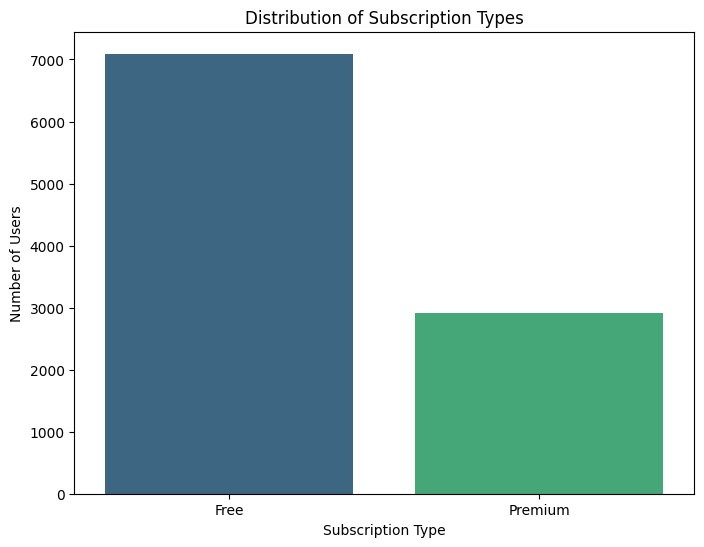


Age Distribution:


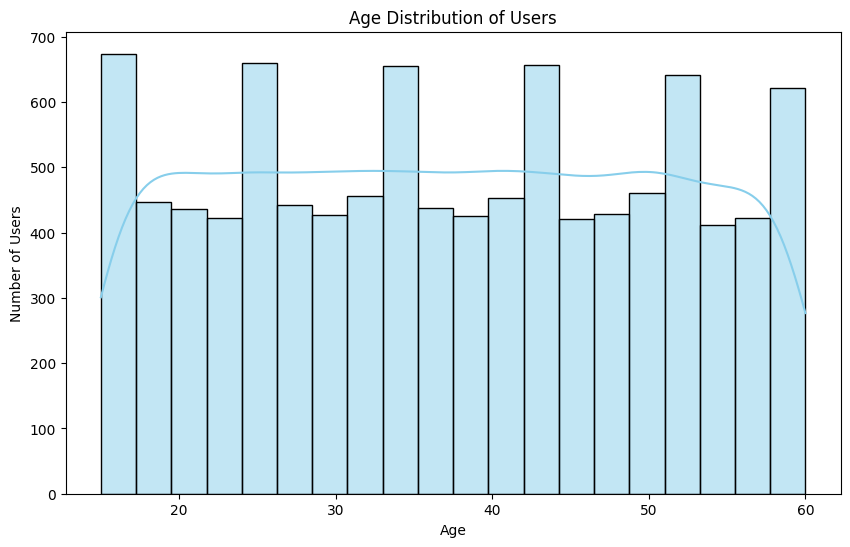


Gender Distribution:
gender
Female        33.96
Male          33.11
Non-binary    32.93
Name: proportion, dtype: float64


<ipython-input-9-eaca9039d550>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_users, palette='cividis')


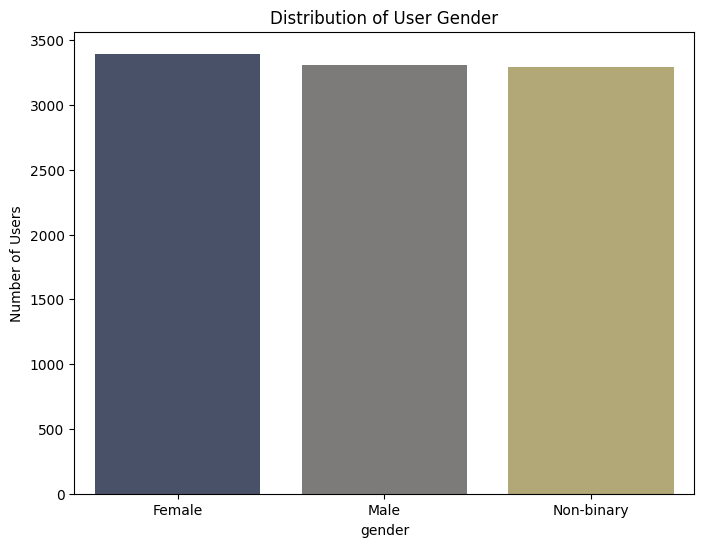


--- 2. Content Consumption Trends ---

Top 10 Genres by Play Count:
genre
Sertanejo       177725
Pop             143009
MPB             133992
Funk Carioca     97993
Rock             85844
Pagode           75635
Hip Hop          62251
Forró            49974
Axé              44670
Eletrônica       43740
Name: count, dtype: int64


<ipython-input-9-eaca9039d550>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='plasma')


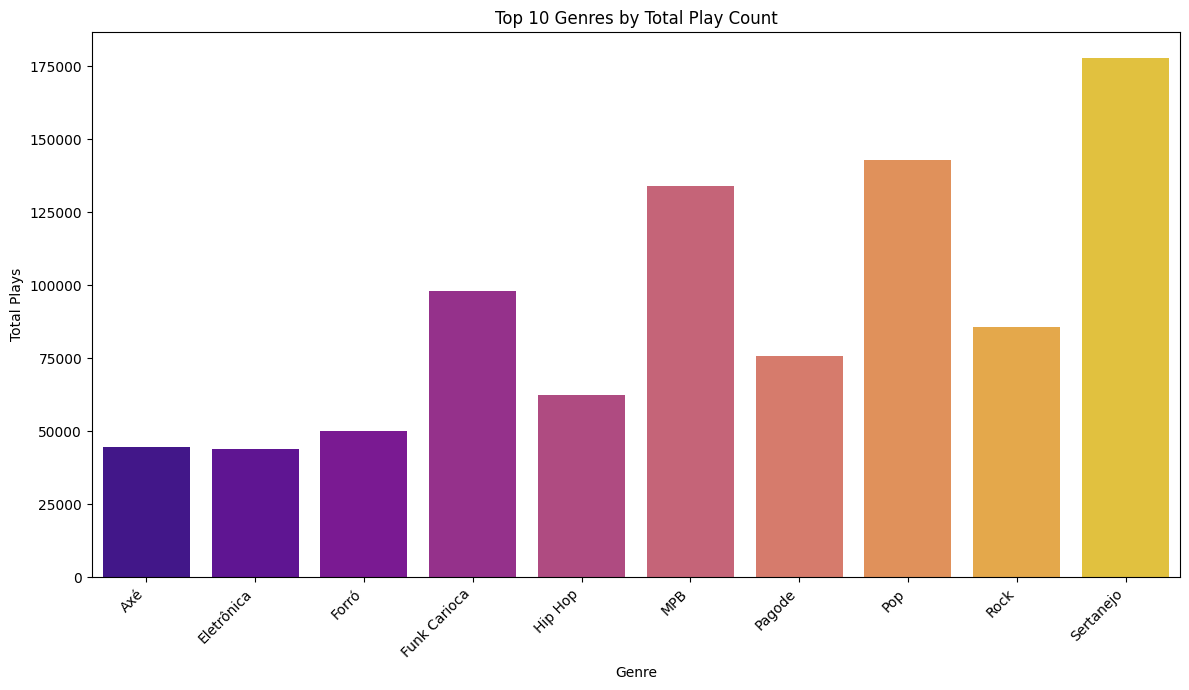


Top 10 Artists by Play Count:
artist_name
Ana Souza                 2955
Olivia Rocha              2741
Luiz Gustavo Silva        2259
Srta. Aylla Barbosa       2227
Luana Cirino              2202
Sr. João Felipe Vargas    2190
Marcelo das Neves         2173
Maysa da Paz              2157
Maysa Aparecida           2142
Lucas Gabriel da Rocha    2100
Name: count, dtype: int64


<ipython-input-9-eaca9039d550>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')


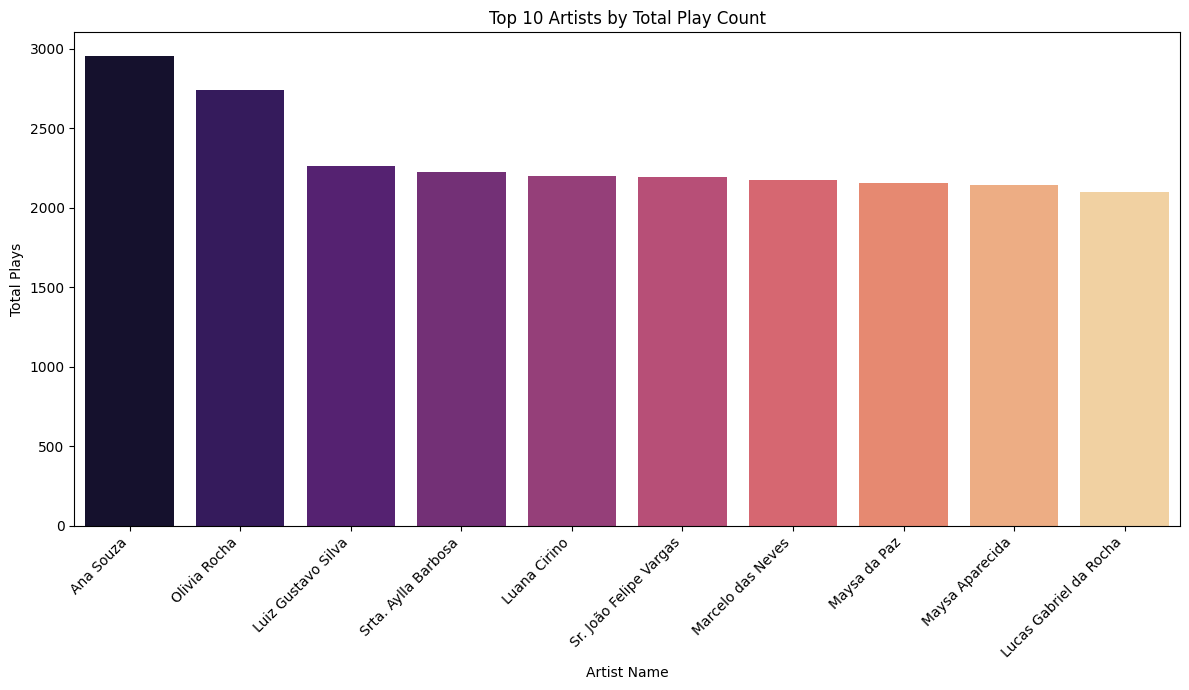

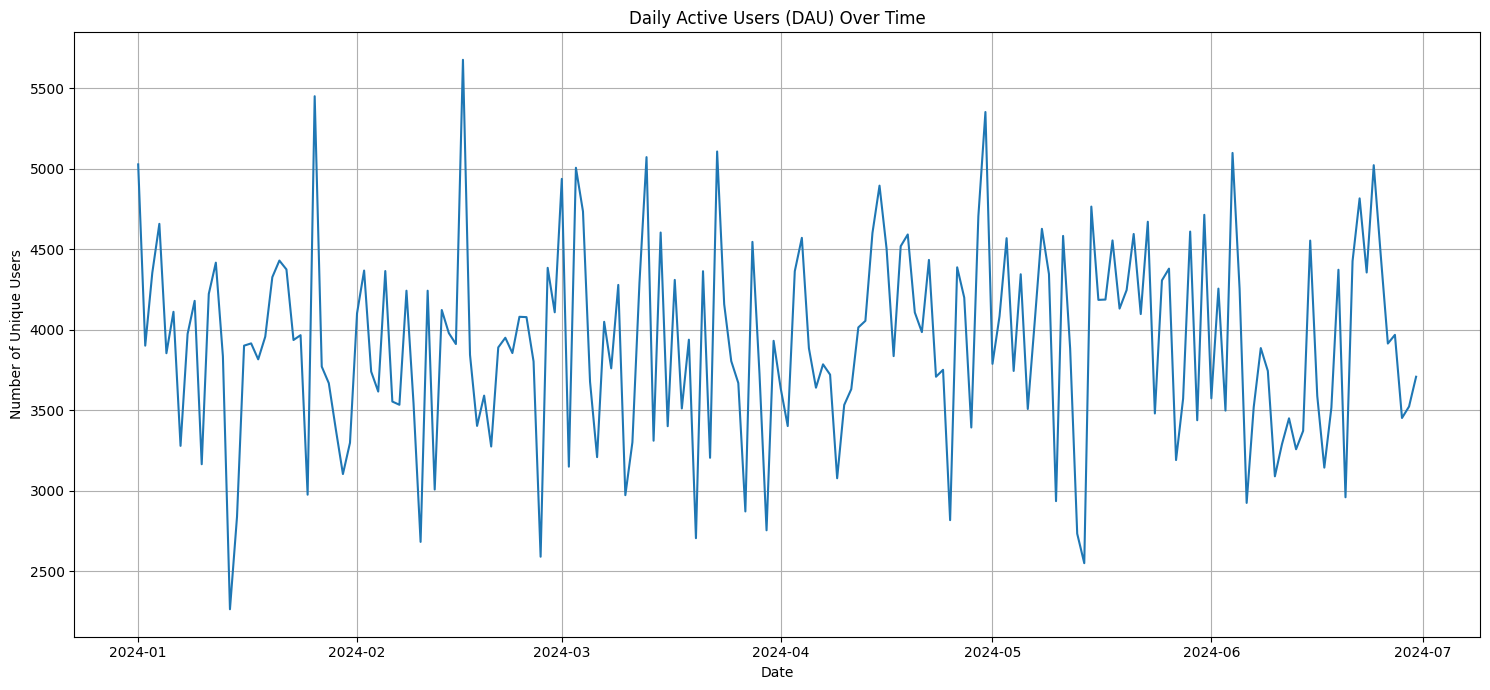


Average Song Play Duration: 2.23 minutes


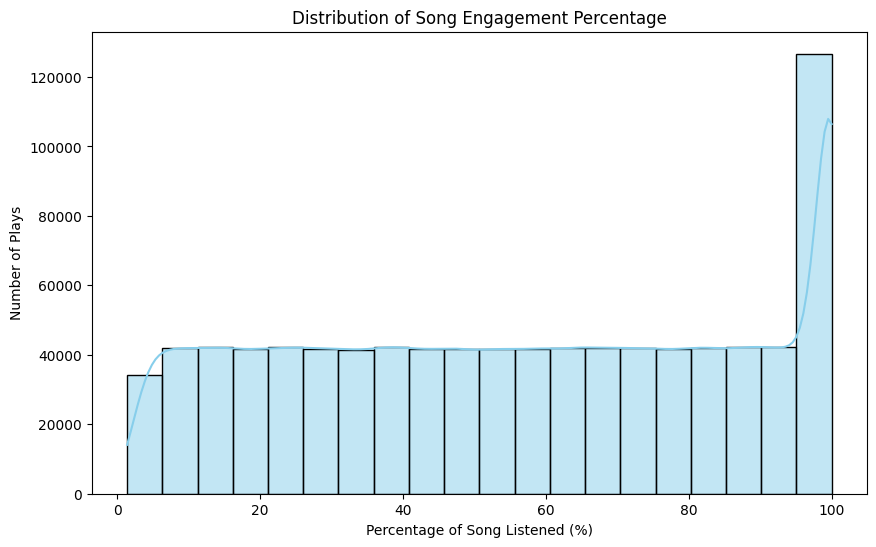


--- 3. Marketing Campaign Performance Analysis ---

Campaign Performance Metrics:
   campaign_id                                campaign_name  \
2         C003            cultivate dynamic niches Campaign   
1         C002            mesh cross-media metrics Campaign   
19        C020  integrate intuitive info-mediaries Campaign   
11        C012        evolve virtual relationships Campaign   
6         C007   maximize web-enabled deliverables Campaign   

          target_audience        budget  impressions  clicks  conversions  \
2   Specific Genre Lovers  49034.539062       840183    7593         1467   
1            Young Adults  36837.980469       314506    6424          672   
19           Young Adults  39713.011719       236872   12688         1122   
11           Young Adults  15727.530273       134555   17022         1334   
6            Young Adults  32287.810547       224606   26841         1824   

          CTR  Conversion_Rate  Cost_Per_Conversion  
2    0.903732        

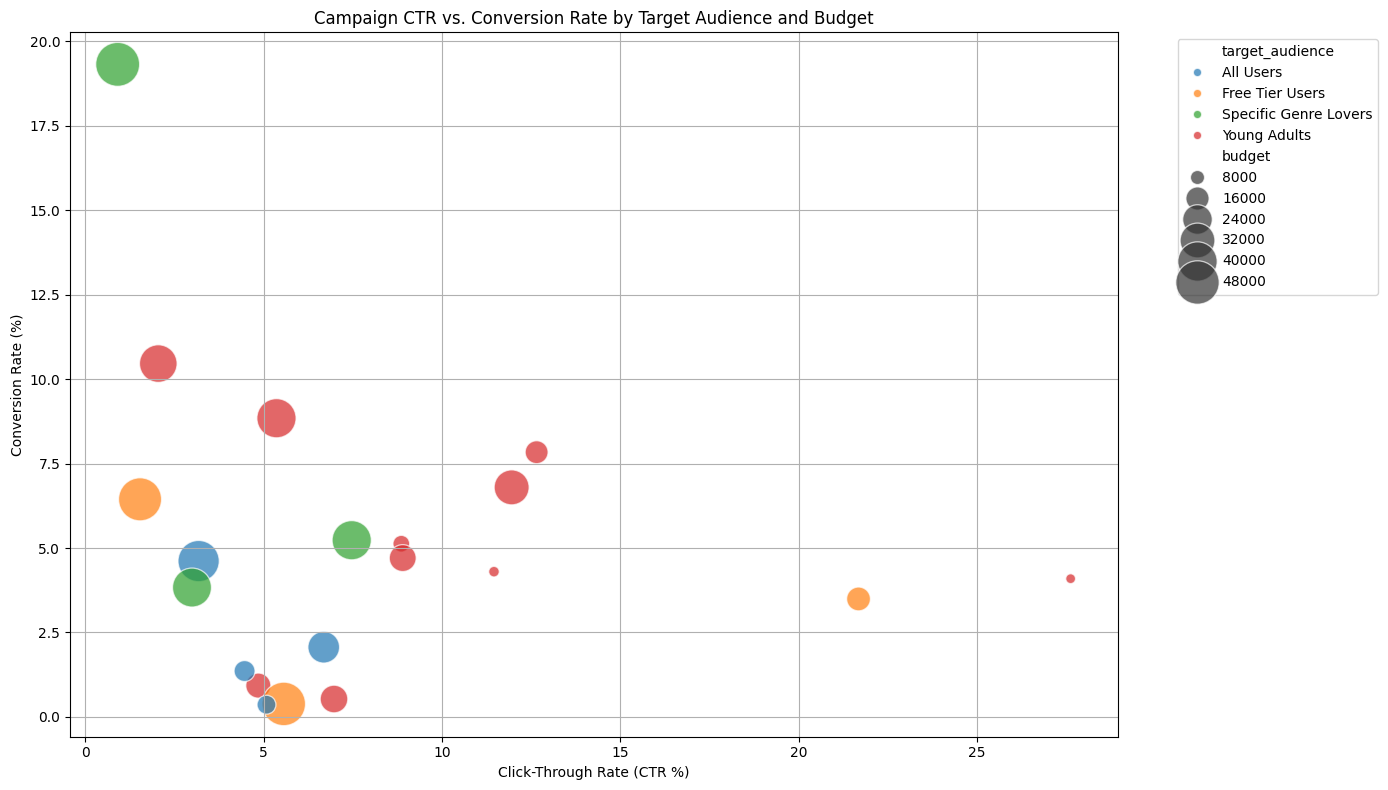


--- 4. Statistical Analysis ---

Comparing Average Play Duration (Premium vs. Free Users):
Premium Avg: 2.23 mins, Free Avg: 2.23 mins
T-statistic: 0.16, P-value: 0.871
Conclusion: There is no statistically significant difference in average play duration between Premium and Free users.


<ipython-input-9-eaca9039d550>:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_songs['release_year'] = popular_songs['release_date'].dt.year



Correlation between Release Year and Play Count for Popular Songs: -0.01
Conclusion: There is a weak or no significant linear correlation.

Genre Preference by Age Group (Proportion):
genre           Axé  Eletrônica     Forró  Funk Carioca   Hip Hop       MPB  \
age_group                                                                     
<18        0.048380    0.047062  0.054548      0.107077  0.067957  0.146849   
18-25      0.048922    0.049108  0.054574      0.106583  0.067564  0.146652   
26-35      0.048951    0.048757  0.054412      0.107761  0.068481  0.146852   
36-50      0.048833    0.047446  0.054987      0.107205  0.068106  0.146468   
50+        0.048776    0.046800  0.054381      0.106744  0.067895  0.145868   

genre        Pagode       Pop      Rock  Sertanejo  
age_group                                           
<18        0.084978  0.155994  0.093538   0.193618  
18-25      0.080696  0.158006  0.092921   0.194974  
26-35      0.082451  0.154779  0.094418   0.19313

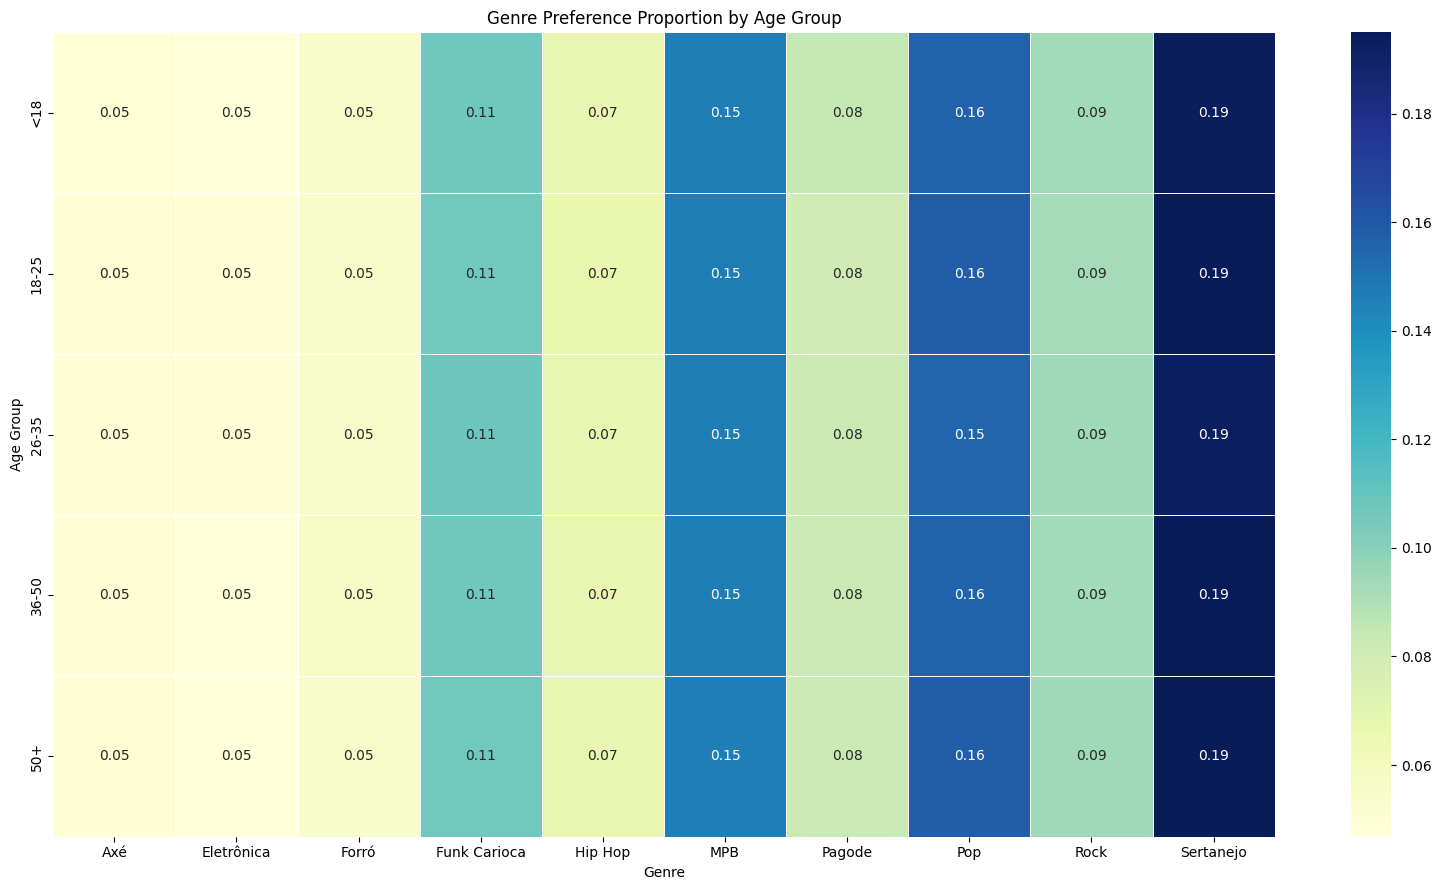

<ipython-input-9-eaca9039d550>:338: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_user_listening_genre['age_group']):



ANOVA on Engagement Percentage by Age Group:
F-statistic: 1.43, P-value: 0.220
Conclusion: There is no statistically significant difference in engagement percentage across different age groups.

--- EDA and Statistical Analysis Complete ---


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install pandas matplotlib seaborn scipy
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc # For garbage collection

# --- Load Data with Optimized dtypes ---
# Define dtypes for memory efficiency
user_dtypes = {
    'user_id': str,
    'join_date': str, # Read as string initially for memory, convert to datetime later if needed
    'age': 'int16',
    'gender': 'category',
    'location': 'category',
    'subscription_type': 'category'
}
song_dtypes = {
    'song_id': str,
    'title': str,
    'artist_id': str,
    'genre': 'category',
    'duration_ms': 'int32',
    'release_date': str # Read as string initially, convert later if needed
}
artist_dtypes = {
    'artist_id': str,
    'artist_name': str,
    'primary_genre': 'category',
    'country': 'category'
}
listening_dtypes = {
    'user_id': str,
    'song_id': str,
    'play_timestamp': str, # Read as string for memory, convert to datetime for time-based analysis
    'play_duration_ms': 'int32'
}
campaign_dtypes = {
    'campaign_id': str,
    'campaign_name': str,
    'start_date': str, # Read as string initially
    'end_date': str,   # Read as string initially
    'target_audience': 'category',
    'budget': 'float32',
    'impressions': 'int32',
    'clicks': 'int32',
    'conversions': 'int32'
}

try:
    # Load dataframes
    df_users = pd.read_csv('users.csv', dtype=user_dtypes)
    df_songs = pd.read_csv('songs.csv', dtype=song_dtypes)
    df_artists = pd.read_csv('artists.csv', dtype=artist_dtypes)
    df_listening = pd.read_csv('listening_activity.csv', dtype=listening_dtypes)
    df_campaigns = pd.read_csv('marketing_campaigns.csv', dtype=campaign_dtypes)

    # Convert dates only after loading, where needed
    df_users['join_date'] = pd.to_datetime(df_users['join_date'])
    df_songs['release_date'] = pd.to_datetime(df_songs['release_date'])
    df_campaigns['start_date'] = pd.to_datetime(df_campaigns['start_date'])
    df_campaigns['end_date'] = pd.to_datetime(df_campaigns['end_date'])

except FileNotFoundError:
    print("Error: Ensure all CSV files (users.csv, songs.csv, artists.csv, listening_activity.csv, marketing_campaigns.csv) are in the same directory.")
    # Allow the cell to complete execution even if files are missing
    # exit() # Removed exit() to be less disruptive in Colab

print("Data loaded successfully for EDA and Statistical Analysis with optimized dtypes.")

# --- Data Preprocessing ---
# Calculate engagement percentage (how much of the song was listened to)
# Merge only necessary columns to keep df_listening_merged lean
# Ensure df_listening exists before merging
if 'df_listening' in locals():
    df_listening_merged = pd.merge(df_listening, df_songs[['song_id', 'duration_ms']], on='song_id', how='left')
    df_listening_merged['engagement_percentage'] = (df_listening_merged['play_duration_ms'] / df_listening_merged['duration_ms']) * 100
    df_listening_merged['engagement_percentage'] = df_listening_merged['engagement_percentage'].clip(upper=100).astype('float32') # Clip and optimize dtype

    # Free up memory from original df_listening if it's no longer needed in its raw form
    del df_listening
    gc.collect()
else:
    print("Listening activity data not loaded, skipping analysis steps that depend on it.")


# --- 1. User Demographics Analysis ---
print("\n--- 1. User Demographics Analysis ---")
if 'df_users' in locals():
    print("Subscription Type Distribution:")
    print(df_users['subscription_type'].value_counts(normalize=True) * 100)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='subscription_type', data=df_users, palette='viridis')
    plt.title('Distribution of Subscription Types')
    plt.xlabel('Subscription Type')
    plt.ylabel('Number of Users')
    plt.show()
    plt.close() # Close plot to free memory

    print("\nAge Distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_users['age'], bins=20, kde=True, color='skyblue') # Changed palette for consistent colors
    plt.title('Age Distribution of Users')
    plt.xlabel('Age')
    plt.ylabel('Number of Users')
    plt.show()
    plt.close()

    print("\nGender Distribution:")
    print(df_users['gender'].value_counts(normalize=True) * 100)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='gender', data=df_users, palette='cividis')
    plt.title('Distribution of User Gender')
    plt.ylabel('Number of Users')
    plt.show()
    plt.close()
else:
    print("User data not loaded, skipping demographics analysis.")


# --- 2. Content Consumption Trends ---
print("\n--- 2. Content Consumption Trends ---")
if 'df_listening_merged' in locals() and 'df_songs' in locals() and 'df_artists' in locals():
    # Top Genres by Play Count - use df_listening_merged for genre info
    # Only merge genre for this specific calculation
    df_temp_listening_genre = pd.merge(
        df_listening_merged[['song_id', 'user_id']], # Keep only what's needed for this
        df_songs[['song_id', 'genre']],
        on='song_id',
        how='left'
    )
    top_genres = df_temp_listening_genre['genre'].value_counts().head(10)
    print("\nTop 10 Genres by Play Count:")
    print(top_genres)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette='plasma')
    plt.title('Top 10 Genres by Total Play Count')
    plt.xlabel('Genre')
    plt.ylabel('Total Plays')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.close()
    del df_temp_listening_genre # Free memory
    gc.collect()

    # Top Artists by Play Count
    # Merge artist_id from songs, then artist_name from artists
    df_temp_listening_artist = pd.merge(
        df_listening_merged[['song_id', 'user_id']],
        df_songs[['song_id', 'artist_id']],
        on='song_id',
        how='left'
    )
    df_temp_listening_artist = pd.merge(
        df_temp_listening_artist,
        df_artists[['artist_id', 'artist_name']],
        on='artist_id',
        how='left'
    )
    top_artists = df_temp_listening_artist['artist_name'].value_counts().head(10)
    print("\nTop 10 Artists by Play Count:")
    print(top_artists)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_artists.index, y=top_artists.values, palette='magma')
    plt.title('Top 10 Artists by Total Play Count')
    plt.xlabel('Artist Name')
    plt.ylabel('Total Plays')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.close()
    del df_temp_listening_artist # Free memory
    gc.collect()

    # Daily Active Users (DAU) Trend
    # Convert play_timestamp to datetime BEFORE calculating DAU
    df_listening_merged['play_timestamp'] = pd.to_datetime(df_listening_merged['play_timestamp'])
    dau_daily = df_listening_merged.groupby(df_listening_merged['play_timestamp'].dt.date)['user_id'].nunique()
    plt.figure(figsize=(15, 7))
    dau_daily.plot(title='Daily Active Users (DAU) Over Time', xlabel='Date', ylabel='Number of Unique Users')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()
    # Keep the converted timestamp column in df_listening_merged for later use if needed

    # Average Session Duration (approximated by average song play duration)
    # Using df_listening_merged's play_duration_ms
    avg_play_duration = df_listening_merged['play_duration_ms'].mean() / 1000 / 60 # in minutes
    print(f"\nAverage Song Play Duration: {avg_play_duration:.2f} minutes")

    # Engagement Percentage Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df_listening_merged['engagement_percentage'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Song Engagement Percentage')
    plt.xlabel('Percentage of Song Listened (%)')
    plt.ylabel('Number of Plays')
    plt.show()
    plt.close()
else:
    print("Listening activity, songs, or artists data not loaded, skipping content consumption analysis.")

# --- 3. Marketing Campaign Performance Analysis ---
print("\n--- 3. Marketing Campaign Performance Analysis ---")
if 'df_campaigns' in locals():
    # Calculations on df_campaigns directly
    df_campaigns['CTR'] = (df_campaigns['clicks'] / df_campaigns['impressions']) * 100
    # Handle potential division by zero for conversions
    df_campaigns['Conversion_Rate'] = df_campaigns.apply(lambda row: (row['conversions'] / row['clicks']) * 100 if row['clicks'] > 0 else 0, axis=1)
    df_campaigns['Cost_Per_Conversion'] = df_campaigns.apply(lambda row: row['budget'] / row['conversions'] if row['conversions'] > 0 else np.inf, axis=1) # Use np.inf for no conversions

    print("\nCampaign Performance Metrics:")
    print(df_campaigns[['campaign_id', 'campaign_name', 'target_audience', 'budget', 'impressions', 'clicks', 'conversions', 'CTR', 'Conversion_Rate', 'Cost_Per_Conversion']].sort_values(by='Conversion_Rate', ascending=False).head())

    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='CTR', y='Conversion_Rate', size='budget', hue='target_audience', data=df_campaigns, sizes=(50, 1000), alpha=0.7)
    plt.title('Campaign CTR vs. Conversion Rate by Target Audience and Budget')
    plt.xlabel('Click-Through Rate (CTR %)')
    plt.ylabel('Conversion Rate (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Marketing campaign data not loaded, skipping campaign performance analysis.")

# --- 4. Statistical Analysis ---
print("\n--- 4. Statistical Analysis ---")

if 'df_listening_merged' in locals() and 'df_users' in locals() and 'df_songs' in locals():
    # A. Are Premium Users more engaged? (e.g., higher average play duration)
    # Merge with df_users subscription_type only for this analysis
    df_engagement_by_sub = pd.merge(df_listening_merged[['user_id', 'play_duration_ms']],
                                    df_users[['user_id', 'subscription_type']],
                                    on='user_id',
                                    how='left')

    premium_plays = df_engagement_by_sub[df_engagement_by_sub['subscription_type'] == 'Premium']['play_duration_ms'].dropna()
    free_plays = df_engagement_by_sub[df_engagement_by_sub['subscription_type'] == 'Free']['play_duration_ms'].dropna()

    if len(premium_plays) > 1 and len(free_plays) > 1:
        t_stat, p_value = stats.ttest_ind(premium_plays, free_plays, equal_var=False)
        print(f"\nComparing Average Play Duration (Premium vs. Free Users):")
        print(f"Premium Avg: {premium_plays.mean()/1000/60:.2f} mins, Free Avg: {free_plays.mean()/1000/60:.2f} mins")
        print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")
        if p_value < 0.05:
            print("Conclusion: There is a statistically significant difference in average play duration between Premium and Free users.")
        else:
            print("Conclusion: There is no statistically significant difference in average play duration between Premium and Free users.")
    else:
        print("Not enough data for t-test for Premium vs Free users.")

    del df_engagement_by_sub, premium_plays, free_plays # Free memory
    gc.collect()

    # B. Correlation between release date and play count (for popular songs)
    song_play_counts = df_listening_merged['song_id'].value_counts().reset_index()
    song_play_counts.columns = ['song_id', 'play_count']
    # Merge with df_songs just the relevant columns
    df_songs_with_counts = pd.merge(df_songs[['song_id', 'release_date']], song_play_counts, on='song_id', how='left').fillna(0)
    df_songs_with_counts['play_count'] = df_songs_with_counts['play_count'].astype(int)

    # release_date is already datetime from loading phase

    popular_songs = df_songs_with_counts[df_songs_with_counts['play_count'] > df_songs_with_counts['play_count'].quantile(0.75)]
    popular_songs['release_year'] = popular_songs['release_date'].dt.year

    if not popular_songs.empty:
        correlation = popular_songs['release_year'].corr(popular_songs['play_count'])
        print(f"\nCorrelation between Release Year and Play Count for Popular Songs: {correlation:.2f}")
        if correlation is not None: # Check if correlation is not NaN (happens with insufficient data)
            if correlation > 0.3:
                print("Conclusion: There is a positive correlation, newer songs tend to have more plays.")
            elif correlation < -0.3:
                print("Conclusion: There is a negative correlation, older songs tend to have more plays.")
            else:
                print("Conclusion: There is a weak or no significant linear correlation.")
        else:
             print("Conclusion: Correlation could not be calculated due to insufficient data in popular songs.")
    else:
        print("Not enough popular songs to analyze correlation.")

    del song_play_counts, df_songs_with_counts # Free memory
    gc.collect()
    # Delete popular_songs separately if it was created
    if 'popular_songs' in locals():
         del popular_songs
         gc.collect()


    # C. Analyze genre preferences by age group
    # Merge relevant columns only
    df_user_listening_genre = pd.merge(
        df_listening_merged[['user_id', 'song_id', 'engagement_percentage']], # Keep engagement percentage for ANOVA later
        df_songs[['song_id', 'genre']],
        on='song_id',
        how='left'
    )
    df_user_listening_genre = pd.merge(
        df_user_listening_genre,
        df_users[['user_id', 'age']],
        on='user_id',
        how='left'
    )

    df_user_listening_genre['age_group'] = pd.cut(df_user_listening_genre['age'], bins=[0, 18, 25, 35, 50, 100],
                                                labels=['<18', '18-25', '26-35', '36-50', '50+'], right=False)

    # Ensure age_group is not all NaN before creating pivot table
    if not df_user_listening_genre['age_group'].isnull().all():
        genre_age_pivot = pd.crosstab(df_user_listening_genre['age_group'], df_user_listening_genre['genre'], normalize='index')
        print("\nGenre Preference by Age Group (Proportion):")
        print(genre_age_pivot.head())

        plt.figure(figsize=(16, 9))
        sns.heatmap(genre_age_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
        plt.title('Genre Preference Proportion by Age Group')
        plt.xlabel('Genre')
        plt.ylabel('Age Group')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print("Age group data could not be created, skipping genre preference by age group analysis.")


    # D. Anova on Engagement Percentage across different Age Groups
    age_groups_data = []
    # Ensure categories are ordered for consistent iteration
    if 'df_user_listening_genre' in locals() and not df_user_listening_genre['age_group'].isnull().all():
        if pd.api.types.is_categorical_dtype(df_user_listening_genre['age_group']):
            # Ensure categories are not None before accessing
            if df_user_listening_genre['age_group'].cat.categories is not None:
                age_group_categories = df_user_listening_genre['age_group'].cat.categories
            else:
                age_group_categories = df_user_listening_genre['age_group'].dropna().unique()
                age_group_categories.sort() # Sort if not categorical
        else:
            age_group_categories = df_user_listening_genre['age_group'].dropna().unique()
            age_group_categories.sort() # Sort if not categorical


        for group in age_group_categories:
            # Ensure enough non-NaN data points (at least 2) for variance calculation
            group_engagement = df_user_listening_genre[df_user_listening_genre['age_group'] == group]['engagement_percentage'].dropna()
            if len(group_engagement) >= 2:
                age_groups_data.append(group_engagement)

        if len(age_groups_data) > 1:
            # Check for sufficient variance within groups for ANOVA to be meaningful
            # Also check if all groups have more than one data point (already checked above)
            if all(g.var() >= 0 for g in age_groups_data):
                try:
                    f_stat, p_value = stats.f_oneway(*age_groups_data)
                    print(f"\nANOVA on Engagement Percentage by Age Group:")
                    print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.3f}")
                    if p_value < 0.05:
                        print("Conclusion: There is a statistically significant difference in engagement percentage across different age groups.")
                    else:
                        print("Conclusion: There is no statistically significant difference in engagement percentage across different age groups.")
                except ValueError as e:
                     print(f"\nANOVA calculation failed: {e}")
                     print("This can happen if all data points in a group are identical (variance is zero).")
                     print("Consider checking the data in `age_groups_data` if this occurs frequently.")
            else:
                 print("Not enough variance within age groups for meaningful ANOVA.")

        else:
            print("Not enough age groups with sufficient data for ANOVA.")

        del df_user_listening_genre, age_groups_data # Free memory
        gc.collect()
    else:
         print("Insufficient age group data for ANOVA analysis.")

else:
    print("Listening activity, users, or songs data not loaded, skipping statistical analysis.")

print("\n--- EDA and Statistical Analysis Complete ---")